In [1]:
from lgca import get_lgca
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib notebook

In [6]:
l = 50
l_spheroid = 2
dims = (l, l)
tmax = 100
restc = 3
rho_0 = 3
ecmdens = 0
adhesion = 10
nodes = np.zeros((l, l, restc+6), dtype=bool)
nodes[..., :l_spheroid, -rho_0:] = 1
lgca = get_lgca(geometry='hex', interaction='wetting', beta=adhesion, gamma=5., bc='rbc', density=0, alpha=1, restchannels=restc,
                nodes=nodes, 
                rho_0=rho_0)
lgca.r_b = .05
lgca.spheroid = np.zeros_like(lgca.cell_density, dtype=bool)
lgca.spheroid[lgca.r_int:-lgca.r_int, :lgca.r_int+l_spheroid] = 1
lgca.ecm = 1 - lgca.spheroid.astype(float)
lgca.ecm *= ecmdens
# lgca.timestep()
lgca.timeevo(tmax, record=True, recordecm=True)

Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


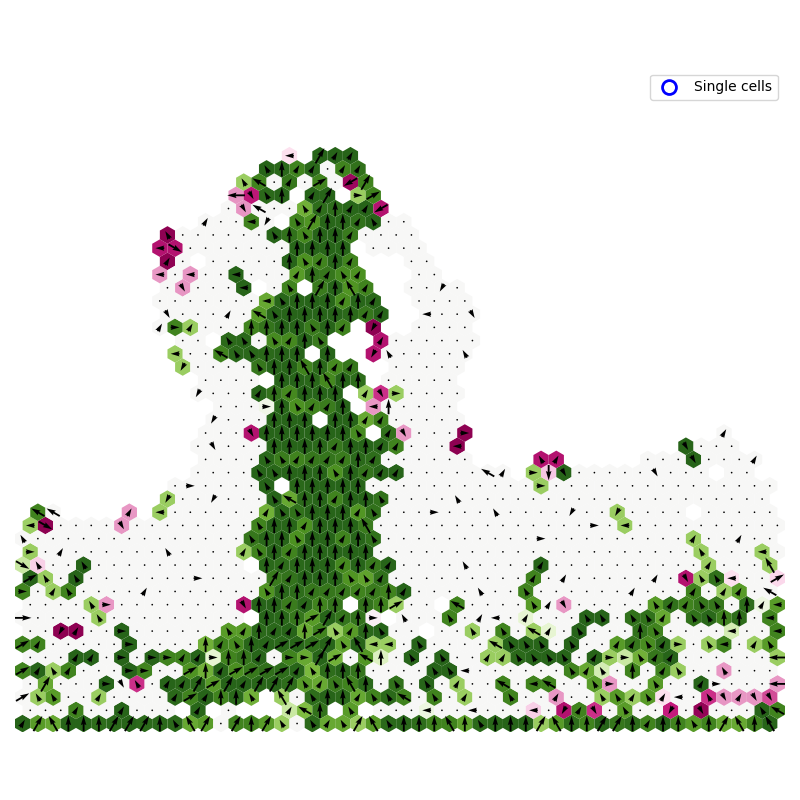

In [4]:
corrs = lgca.calc_velocity_correlation()
dens = lgca.cell_density[lgca.nonborder]
nbs = lgca.nb_sum(dens)
single_cell = ((nbs == 0) & (dens == 1))
# vorts = lgca.calc_vorticity()
lgca.plot_scalarfield(corrs, cmap='PiYG', cbarlabel='Velocity correlation', vmin=-1, vmax=1, mask=lgca.cell_density[lgca.nonborder]>0,
                     cbar=False)
lgca.plot_flow(figindex=plt.gcf().number)
plt.scatter(lgca.xcoords[single_cell], lgca.ycoords[single_cell], s=100, fc='none', ec='b', lw=2, label='Single cells')
plt.legend(loc='upper right')
plt.axis('off')
plt.tight_layout()
# plt.savefig('figures/adhesion_{}_ecm_{}.svg'.format(adhesion, ecmdens), bbox_inches=0, transparent=True, dpi=600)

<IPython.core.display.Javascript object>


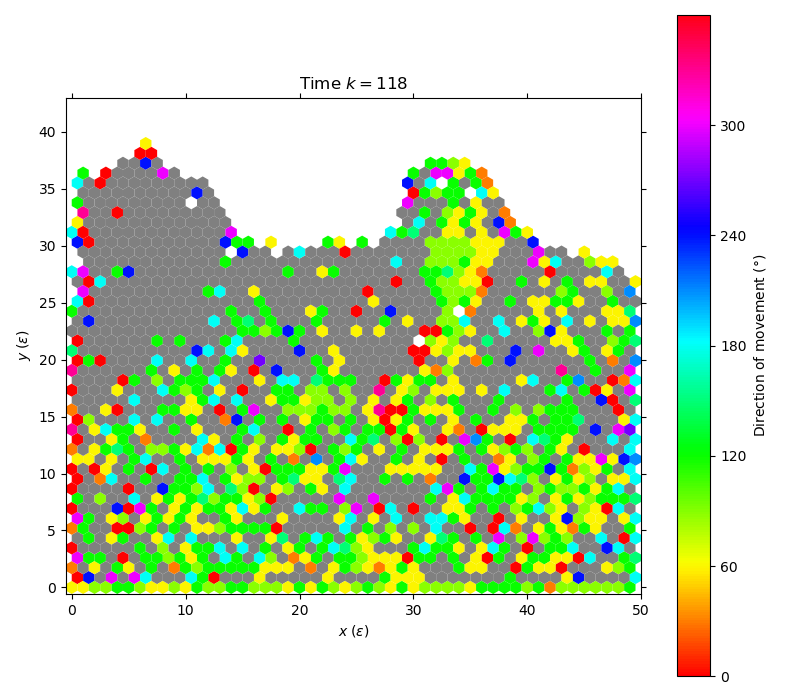

In [8]:
lgca.live_animate_flux()

In [ ]:
lgca.plot_scalarfield(lgca.ecm, cmap='Greys', cbarlabel='ECM density')
# plt.savefig('ecm_field_adhesion_{}_ecm_{}.pdf'.format(adhesion, ecmdens), bbox_inches='tight', transparent=True, dpi=600)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

In [ ]:
ecmprofile = lgca.ecm[lgca.nonborder].mean(0)
ecmerr = lgca.ecm[lgca.nonborder].std(0)
densityprofile = lgca.cell_density[lgca.nonborder].mean(0)
denserr = lgca.cell_density[lgca.nonborder].std(0)
plt.errorbar(lgca.ycoords[0], ecmprofile, yerr=ecmerr/np.sqrt(lgca.lx), ls='--', marker='.', ms=15, lw=2, label='ECM density')
plt.errorbar(lgca.ycoords[0], densityprofile, yerr=denserr/np.sqrt(lgca.lx), ls='--', marker='.', ms=15, lw=2, label='Cell density')
# plt.gca().set_ylim(0, 10)
# plt.xticks(lgca.ycoords[0, ::2], densityprofile[::-1].cumsum()[::-2])
plt.gca().set_xlim(25, 35)

plt.xlabel('y')
# plt.ylabel('ECM density')
plt.legend(loc='right')
plt.tight_layout()
# plt.savefig('figures/ECM density.svg', bbox_inches='tight', transparent=True, dpi=600)

In [ ]:
record = np.moveaxis(lgca.nodes_t[25:], 0, 2)
dens = record.sum(-1)
flux = lgca.calc_flux(record)
v = np.divide(flux, dens[..., None], where=dens[..., None]>0, out=np.zeros_like(flux))
speed = np.linalg.norm(v, axis=-1)

corrs = lgca.calc_velocity_correlation(record)
corr = np.mean(corrs[speed>0])
mean_speed = record[..., :lgca.velocitychannels].sum() / dens.sum()

nbs = lgca.nb_sum(dens)
single_cell = ((nbs == 0) & (dens == 1))
single_cell_num = single_cell.sum()

In [ ]:
print('Correlations =', corr)
print('Mean moving fraction =', mean_speed)
print('Single cells =', single_cell_num)

In [ ]:
dens.shape